<a href="https://colab.research.google.com/github/lililalina/UoM-stats-with-python/blob/main/01%20Understanding-and-Visualizing-Data-Using-Python/week_3_practice_nhanes_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practice notebook for multivariate analysis using NHANES data
This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data. These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook. You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import stats

da = pd.read_csv("/content/drive/MyDrive/COLAB NOTEBOOK/UoM stats with python/NHANES.csv")
da.columns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

##Question 1
Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure (BPXDI1 and BPXDI2). Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

In [2]:
da = da.dropna().astype(int)

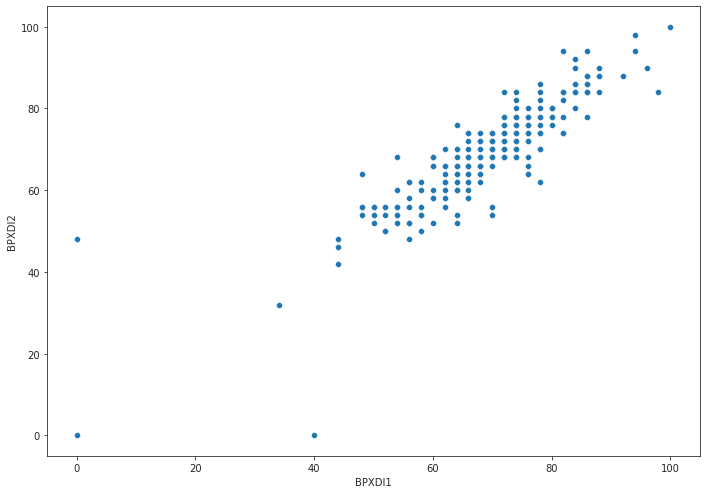

In [3]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()

# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data= da, x="BPXDI1", y="BPXDI2")

In [4]:
x = pd.DataFrame(da[['BPXSY1', 'BPXDI1', 'BPXSY2','BPXDI2']])

In [5]:
x.corr()

,BPXSY1,BPXDI1,BPXSY2,BPXDI2
BPXSY1,1.000000,0.258749,0.954760,0.225749
BPXDI1,0.258749,1.000000,0.297655,0.871593
BPXSY2,0.954760,0.297655,1.000000,0.279470
BPXDI2,0.225749,0.871593,0.279470,1.000000


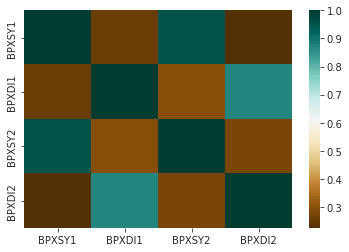

In [6]:
sns.heatmap(x.corr(), cmap = 'BrBG')

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?


__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

In [7]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 

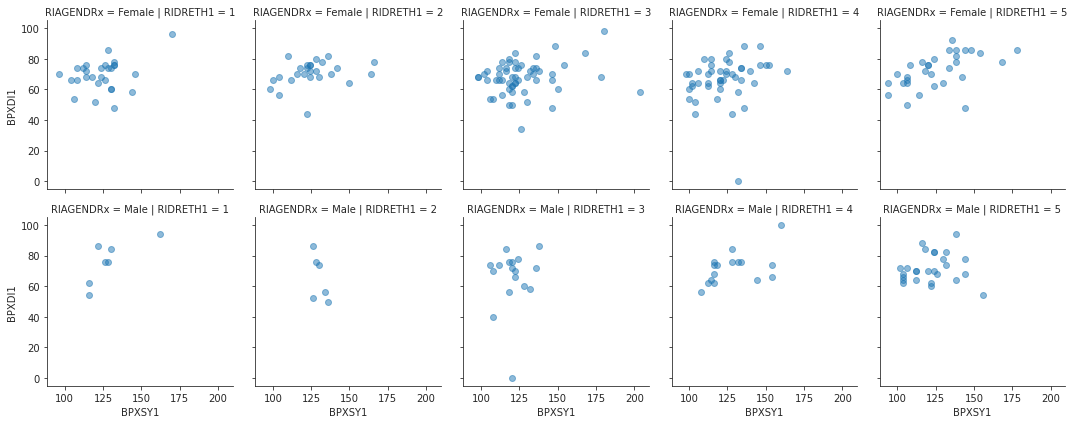

In [8]:
strat = sns.FacetGrid(da, col = 'RIDRETH1', row = 'RIAGENDRx').map(plt.scatter, 'BPXSY1', 'BPXDI1', alpha = 0.5).add_legend()

Q2a. Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

## Question 3
Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

In [9]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 
                                       2: "9-11", 
                                       3: "HS/GED", 
                                       4: "Some college/AA", 
                                       5: "College", 
                                       7: "Refused", 
                                       9: "Don't know"})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


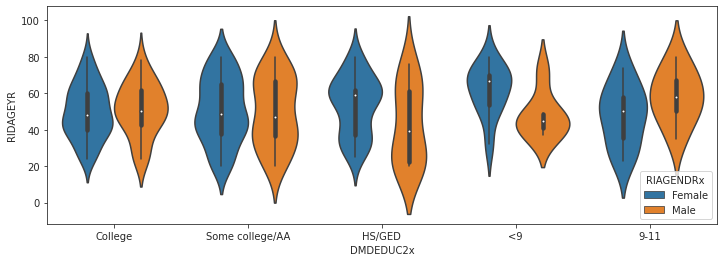

In [10]:
plt.figure(figsize = (12,4))
v = sns.violinplot(da.DMDEDUC2x, da.RIDAGEYR, hue = da.RIAGENDRx)

Q4a. Comment on any evident differences among the age distributions in the different demographic groups.

The age ranges in various education background are mostly similar except for <9 education.

## Question 4
Use violin plots to compare the distributions of BMI within a series of 10-year age bands. Also stratify these plots by gender.

In [11]:
da['age'] = pd.cut(da.RIDAGEYR,[10,20,30,40,50,60,70,80])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


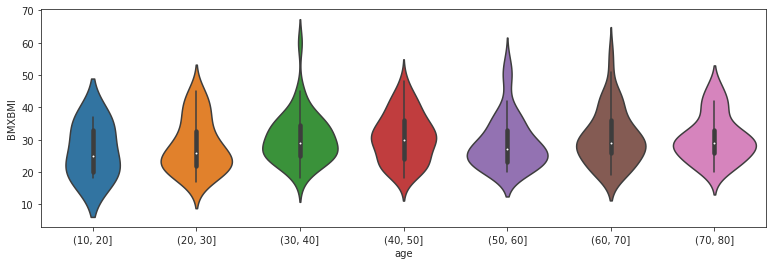

In [12]:
plt.figure(figsize=(13,4))
z = sns.violinplot(da.age, da.BMXBMI)

Q4a. Comment on the trends in BMI across the demographic groups.

For all age group, the median of BMI is around 20-30.